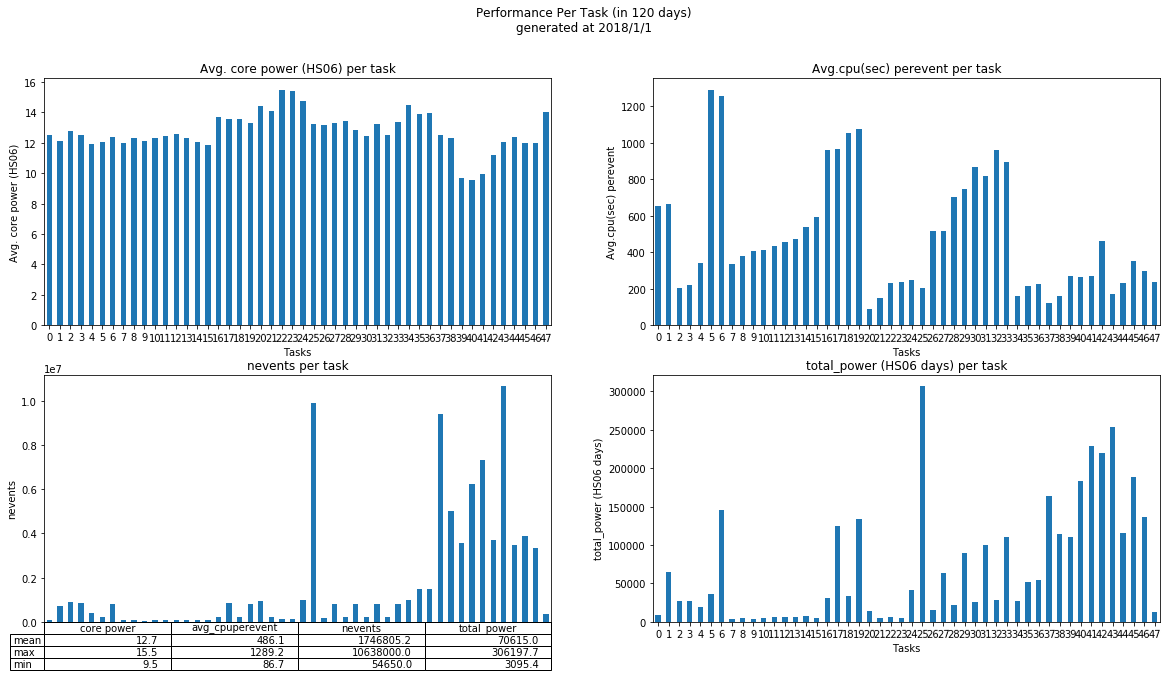

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import table
import time

def ylabel(x):
    yl=x
    if x=="core power":
        yl="Avg. "+x+" (HS06)"
    elif x=="total_power":
        yl=x+" (HS06 days)"
    elif x=="nevents":
        yl=="total events"
    elif x=="avg_cpuperevent":
        yl="Avg.cpu(sec) perevent"
   
    return yl
def get_summary_df(df):
    dfd=df.describe()

    tmp=[dfd["mean":"mean"],dfd["max":"max"],dfd["min":"min"]]
    dfx=pd.concat(tmp)
    dfx=dfx.applymap(lambda x:np.round(x,1))
    return dfx
    
l=time.localtime()[0:3]
today="/".join(map(str,l))

df=pd.read_csv("task.csv").set_index("taskid")
df=df.sort_index()
#print(df.index,df.columns)
df.index=df.index.map(str)

days=df["days"].iloc[1]
del df['Unnamed: 0']
del df["days"]
del df["jobs"]


df["total_power"]=df["core power"]*df["avg_cpuperevent"]*df["nevents"]/(24*3600)
#print(df.head(2))

dfs=get_summary_df(df)

fig,axes = plt.subplots(nrows=2,ncols=2) 

plt.suptitle("Performance Per Task (in %d days)\ngenerated at %s"%(days,today))
#plt.figure(figsize=(60,15))
for nf, f in enumerate(df.columns):
    i=int(nf/2)
    j=nf%2
    ax=axes[i,j]
    if nf==len(df.columns)-2:
        #table(axes[i,j],dfs,loc="bottom",colWidths=[0.10]*len(df.columns))
        ax.get_xaxis().set_visible(False)
        df[f].plot(ax=ax,table=dfs,kind="bar",grid=False,title="%s per task"%ylabel(f),use_index=False,rot=1)
    else:
        df[f].plot(ax=ax,kind="bar",grid=False,title="%s per task"%ylabel(f),use_index=False,rot=1,figsize=(20,10))
    #df[f].plot(ax=axes[i,j],table=dfs,kind="bar",grid=False,figsize=(22,10),title="%s per task"%ylabel(f),use_index=False,rot=1)
    ax.set_xlabel("Tasks")
    ax.set_ylabel(ylabel(f))

fig.savefig("boinc.png")